In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRegressor


Load Data

In [128]:
# Load the data 'C:\Users\CC-Student\Desktop\Warehouse\House_Price\train.csv'
df = pd.read_csv('C:/Users/CC-Student/Desktop/Data/House_Price/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [129]:
df.shape

(1460, 81)

In [130]:
file=r'C:\Users\CC-Student\Desktop\Data\House_Price\test.csv'
df_test = pd.read_csv(file)
#df_test.head(3)

In [131]:
df_test.shape

(1459, 80)

In [132]:
df.describe()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [133]:
#df.drop(['Id'], axis=1, inplace=True)
#df_test.drop(['Id'], axis=1, inplace=True)


In [134]:
df.SalePrice.describe()


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

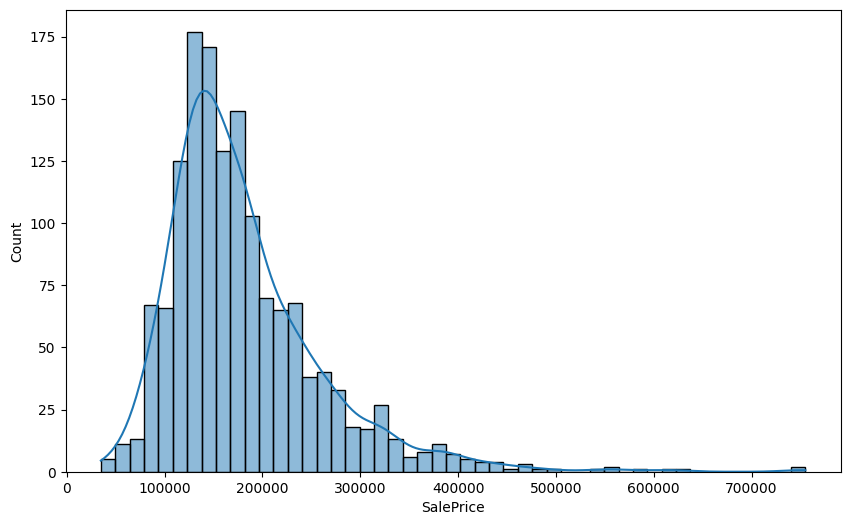

In [135]:
plt.figure(figsize=(10, 6))
sns.histplot(df['SalePrice'], kde=True)
plt.show()

Data Cleaning

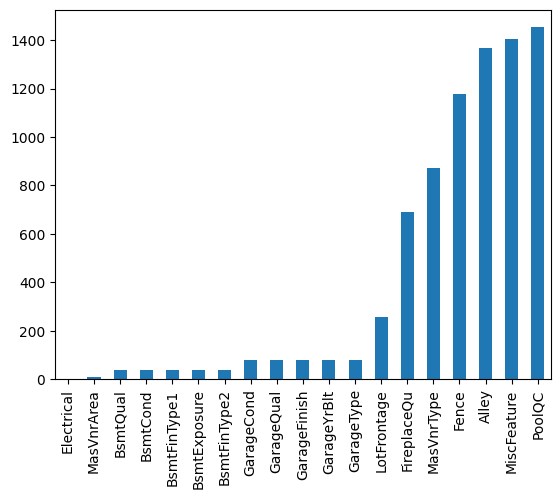

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64


In [136]:
df_missing = df.isnull().sum()
df_missing = df_missing[df_missing > 0]
df_missing.sort_values(inplace=True)
df_missing.plot.bar()
plt.show()
print(df_missing.sort_values(ascending=False))

In [137]:
df.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis=1, inplace=True)
df_test.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis=1, inplace=True)

In [138]:
#numerical  and categorical columns
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df.select_dtypes(include=['object']).columns


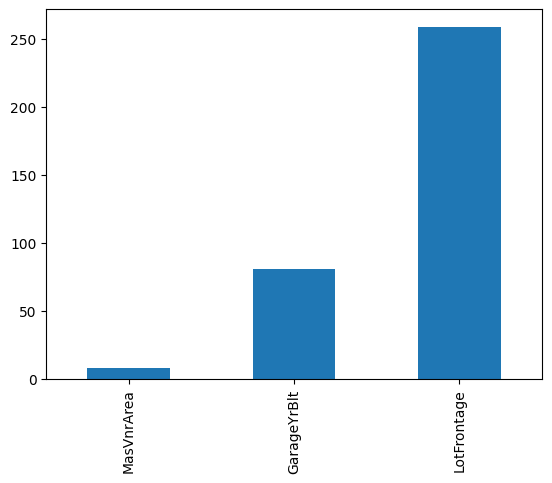

In [139]:
#missing value in nummeric features
df_num = df[numeric_features]
df_num_missing = df_num.isnull().sum()
df_num_missing = df_num_missing[df_num_missing > 0]
df_num_missing.sort_values(inplace=True)
df_num_missing.plot.bar()
plt.show()


In [140]:
# Fill missing numerical values with the mean
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean())
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].mean())
 #for df_test
df_test['LotFrontage'] = df_test['LotFrontage'].fillna(df_test['LotFrontage'].mean())
df_test['GarageYrBlt'] = df_test['GarageYrBlt'].fillna(df_test['GarageYrBlt'].mean())
df_test['MasVnrArea'] = df_test['MasVnrArea'].fillna(df_test['MasVnrArea'].mean())

In [141]:
#EDA 

In [142]:
from sklearn.impute import SimpleImputer

# Impute missing values for categorical features with the most frequent value
imputer = SimpleImputer(strategy='most_frequent')
df[categorical_features] = imputer.fit_transform(df[categorical_features])
df_test[categorical_features] = imputer.transform(df_test[categorical_features])

Exploratory data analysis

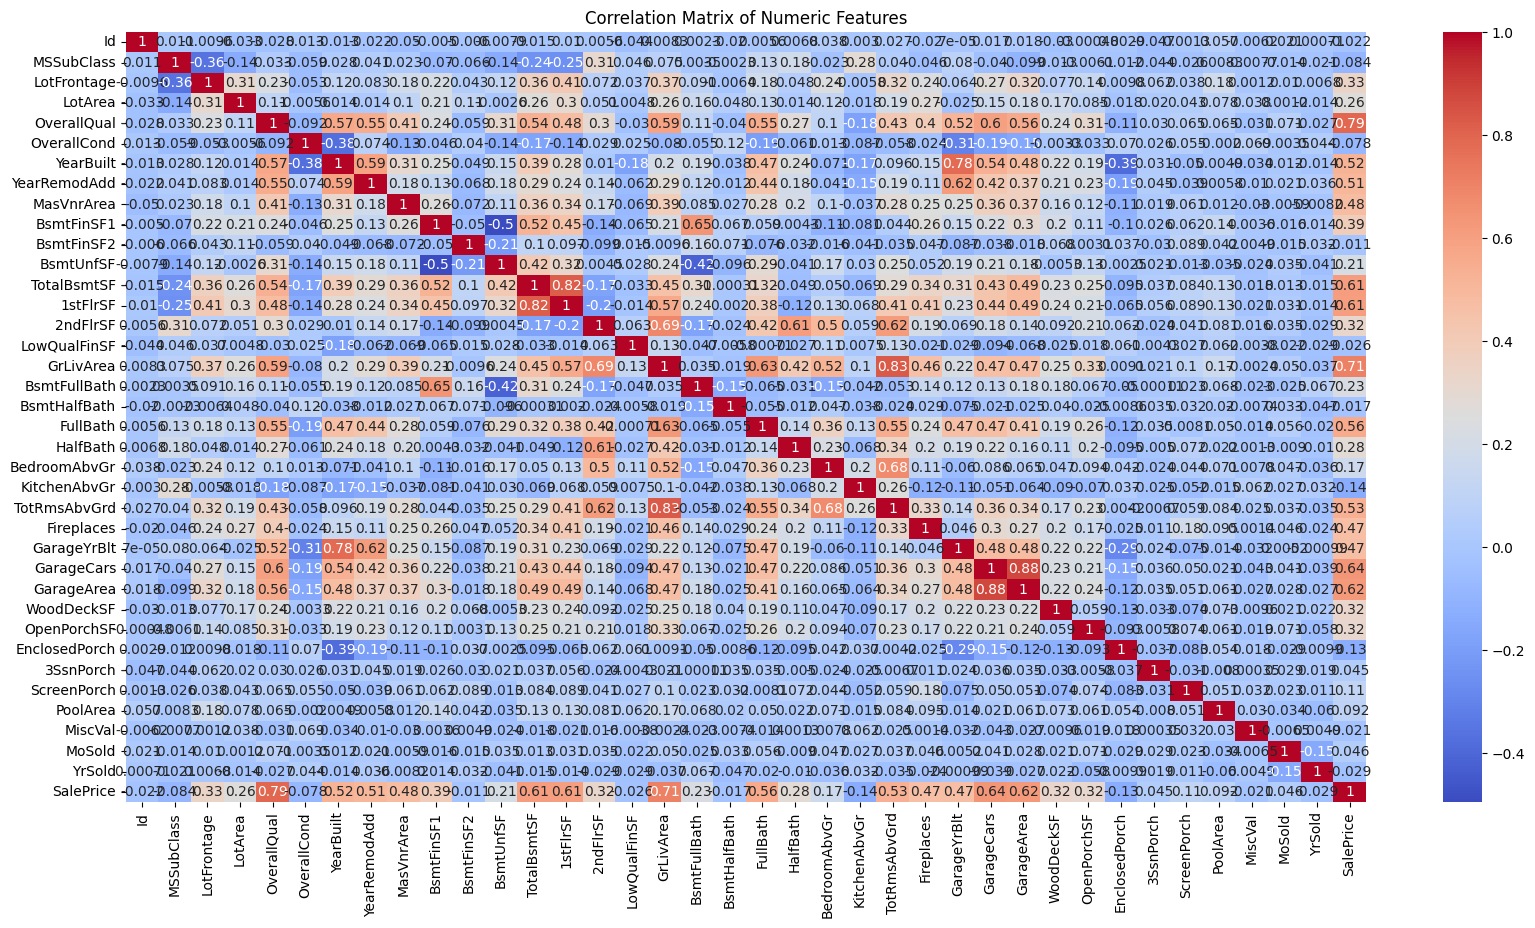

In [143]:
#  correlation matrix for numeric features
corr_matrix = df[numeric_features].corr()

# Plot the heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.show()

In [144]:
# correlation of all features with SalePrice
correlation_with_saleprice = df[numeric_features].corr()['SalePrice'].sort_values(ascending=False) 


print(correlation_with_saleprice.head(15))

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
MasVnrArea      0.475241
GarageYrBlt     0.470177
Fireplaces      0.466929
BsmtFinSF1      0.386420
Name: SalePrice, dtype: float64


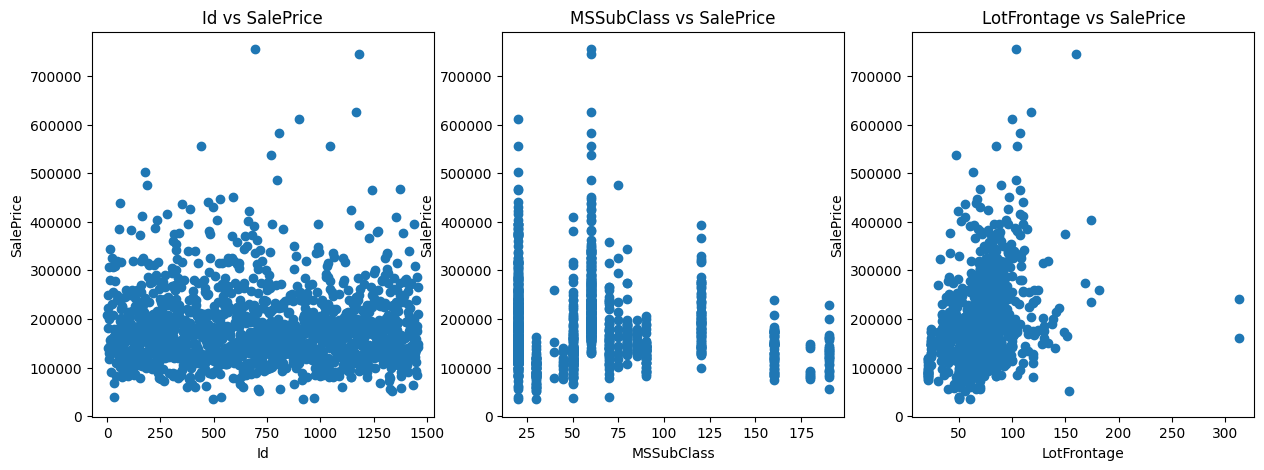

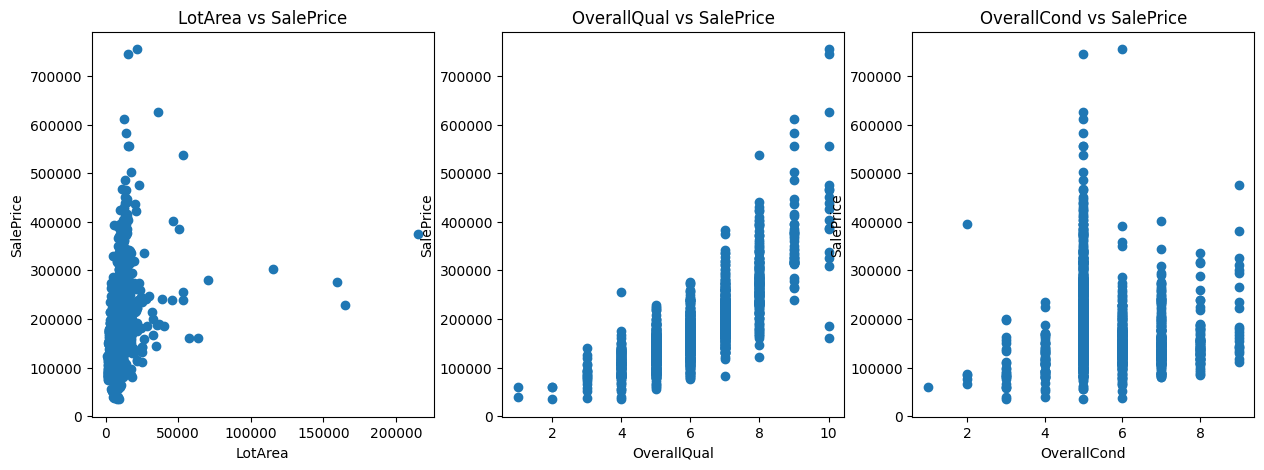

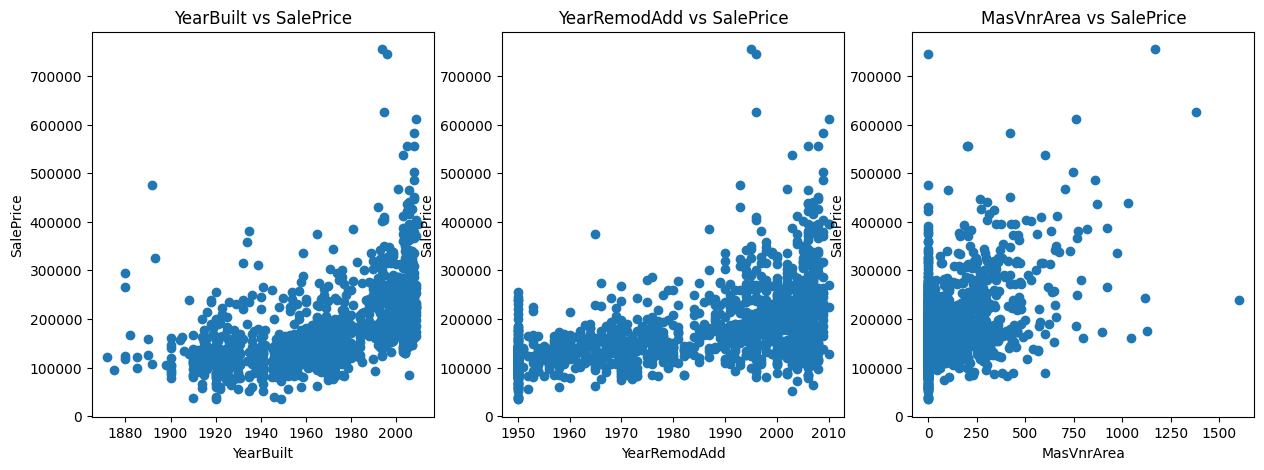

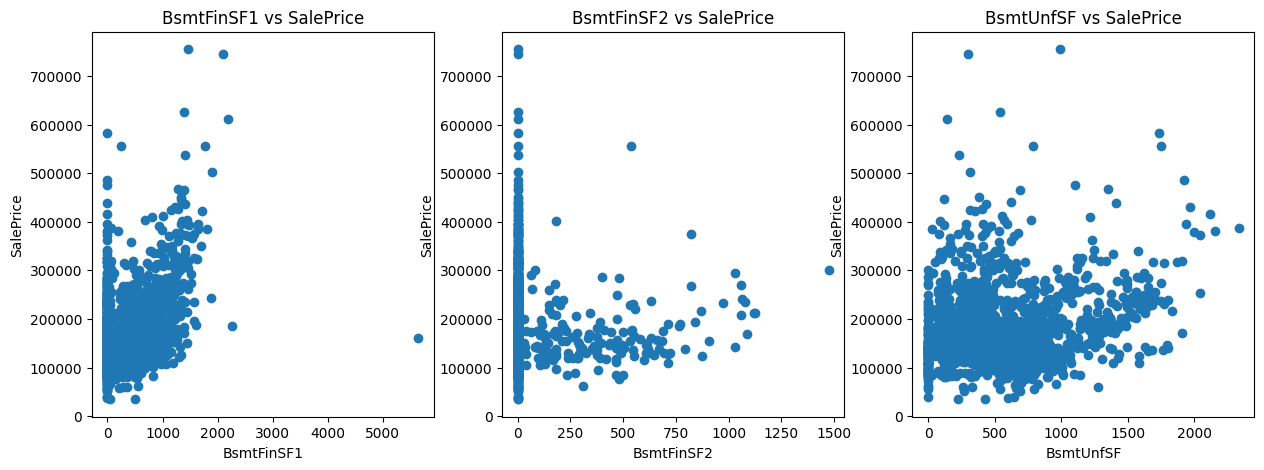

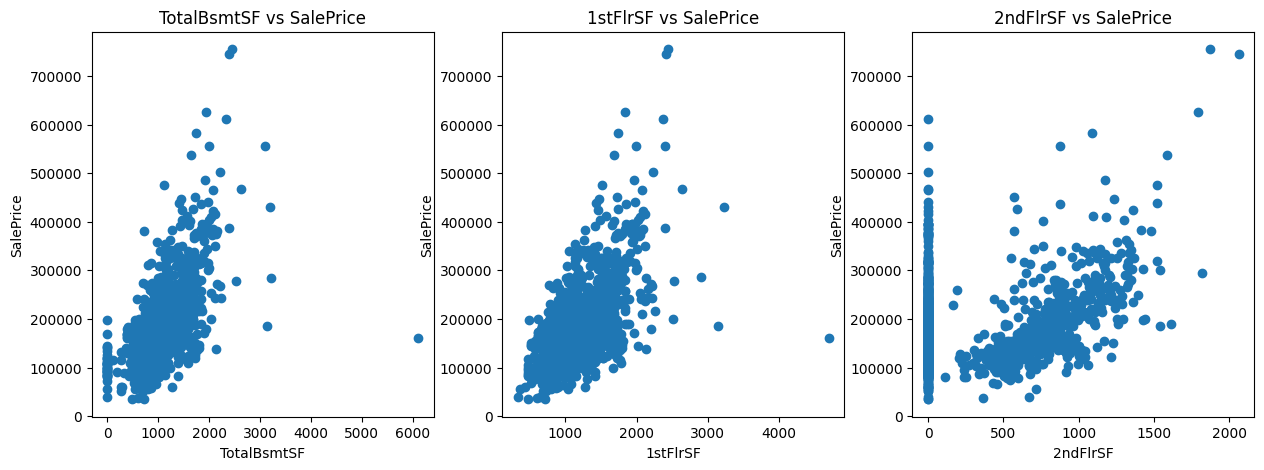

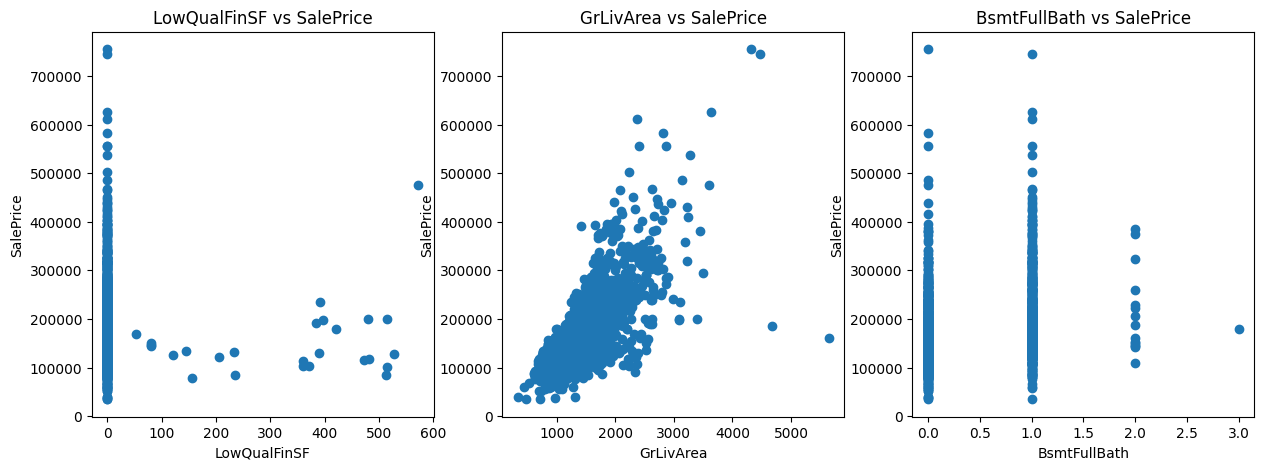

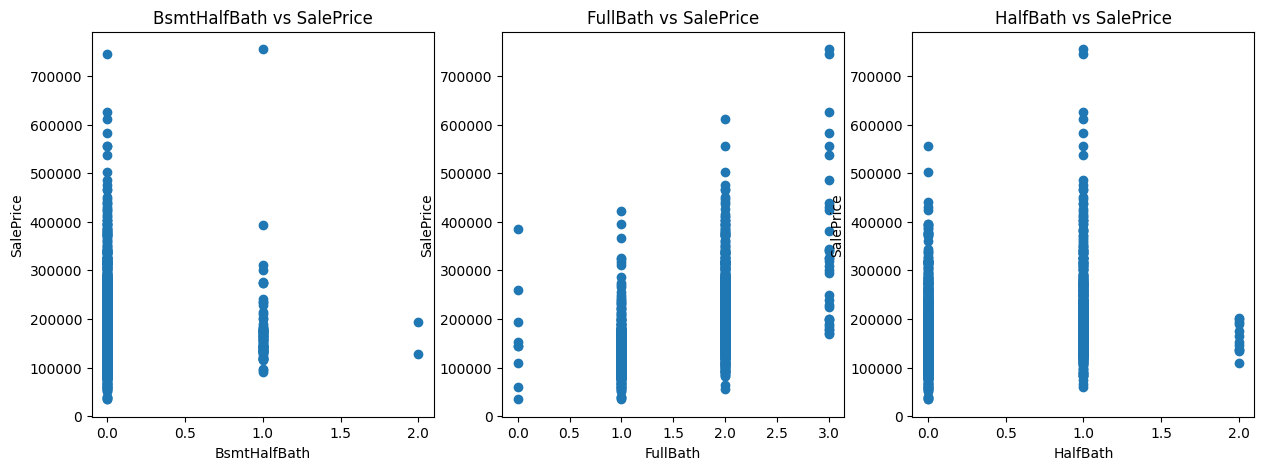

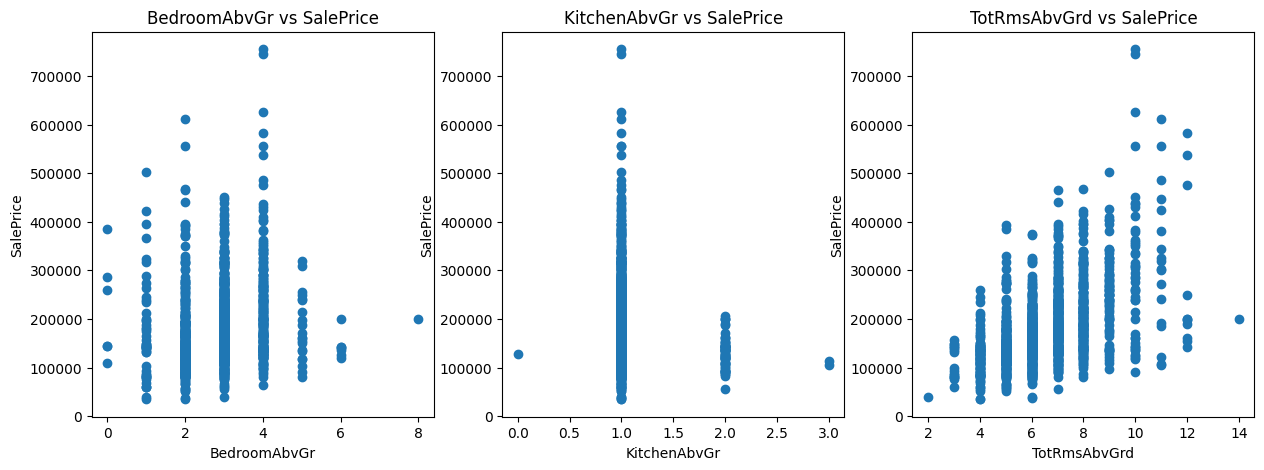

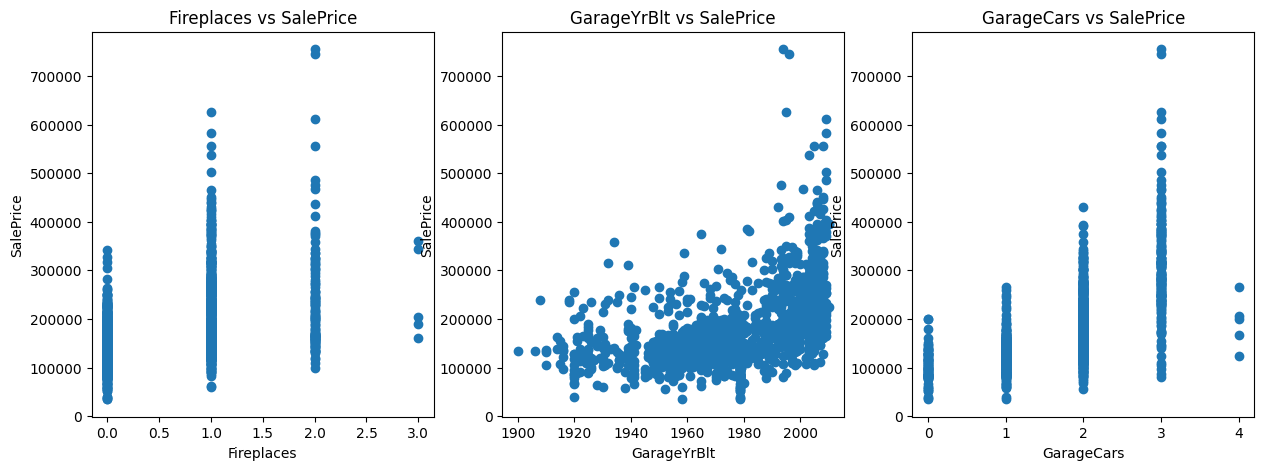

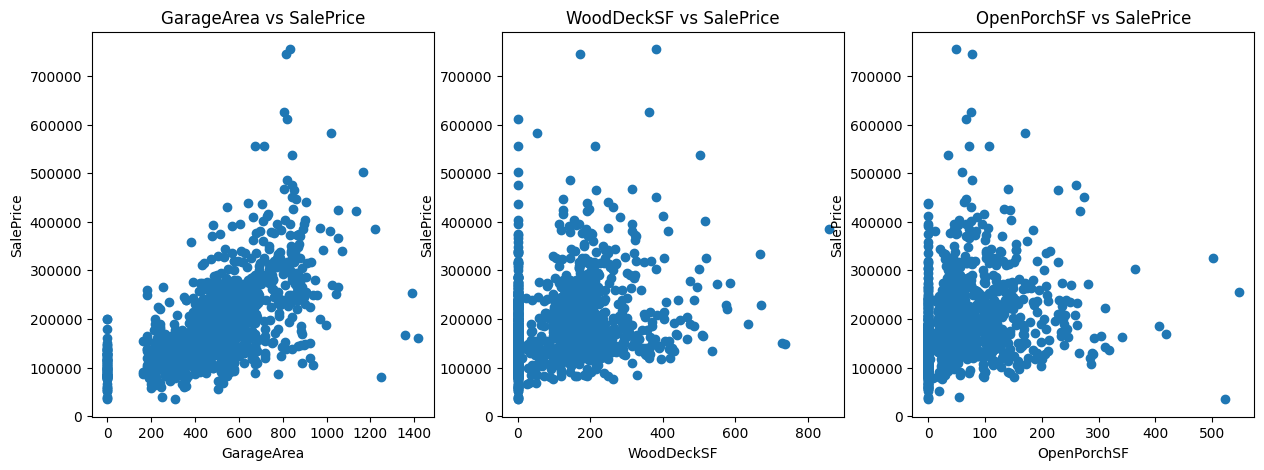

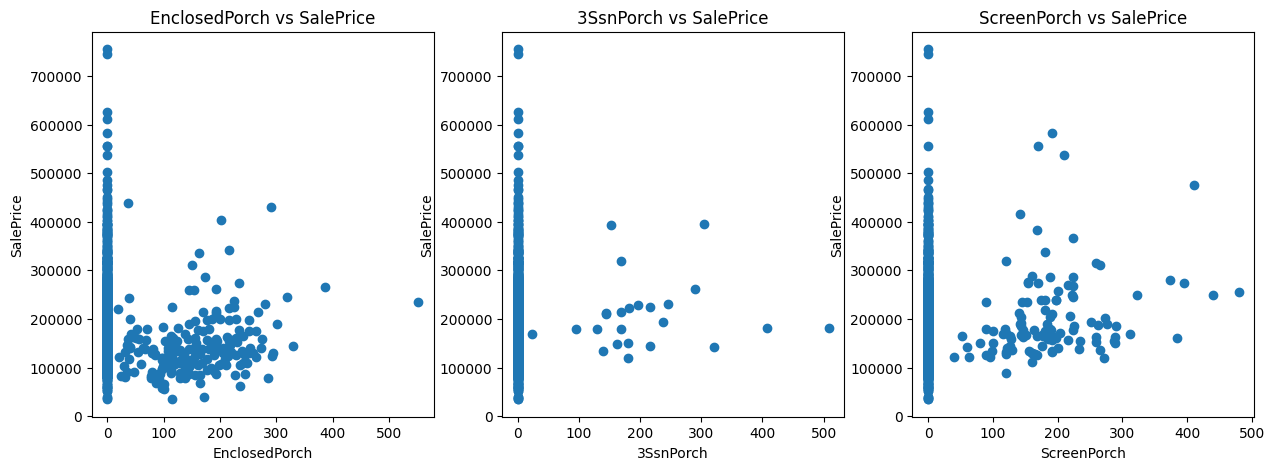

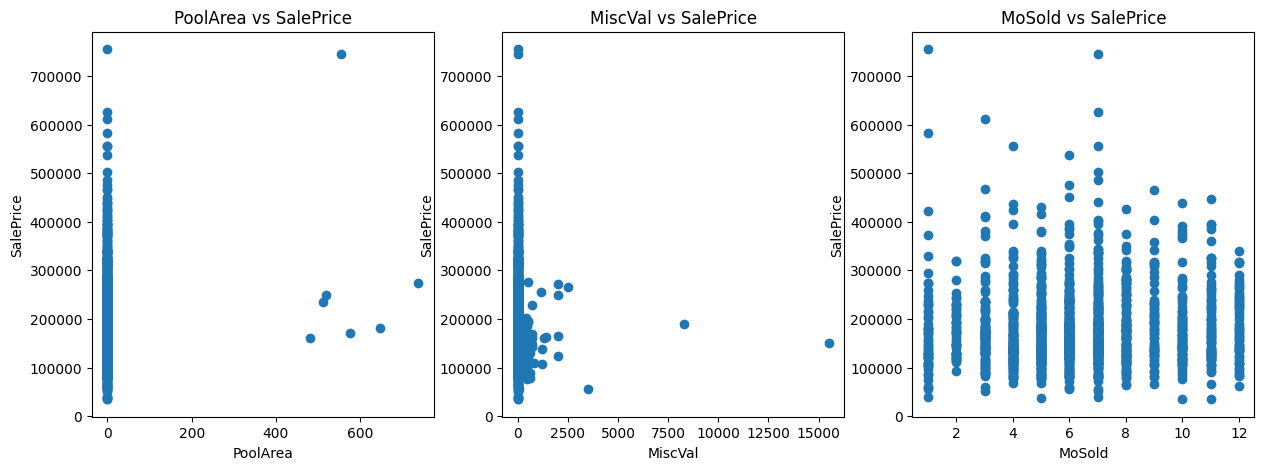

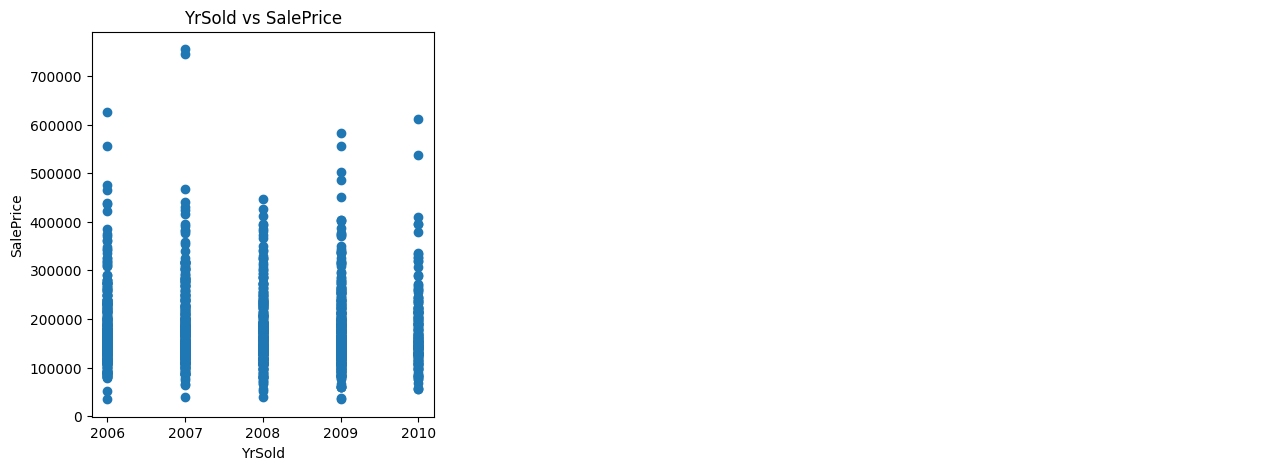

In [145]:
numerical_columns = numeric_features.drop('SalePrice')
plots_per_row = 3
num_plots = len(numerical_columns)

for i in range(0, num_plots, plots_per_row):
    fig, axes = plt.subplots(1, plots_per_row, figsize=(15, 5))  # Create subplots
    
    for j in range(plots_per_row):
        if i + j < num_plots:
            ax = axes[j]
            col = numerical_columns[i + j]
            ax.scatter(df[col], df['SalePrice'])
            ax.set_xlabel(col)
            ax.set_ylabel('SalePrice')
            ax.set_title(f'{col} vs SalePrice')
        else:
            axes[j].axis('off')  # Hide empty subplot
    
    #plt.tight_layout()
    #plt.show()

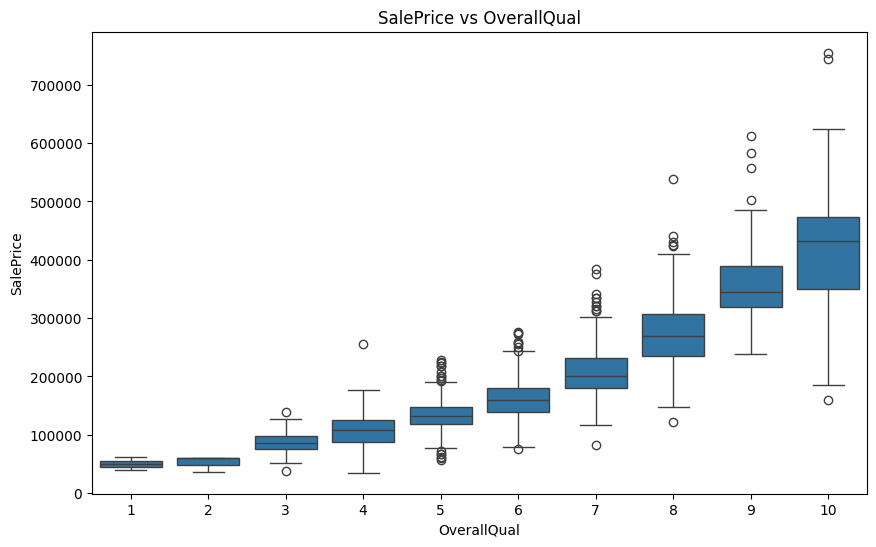

In [146]:
#boxplot for SalePrice vs OverallQual
plt.figure(figsize=(10, 6))
sns.boxplot(x='OverallQual', y='SalePrice', data=df)
plt.title('SalePrice vs OverallQual')
plt.show()


data preprocessing

In [147]:
#drop Id column from the dataset
df.drop('Id', axis=1, inplace=True)
df_test_ids = df_test['Id']
df_test.drop('Id', axis=1, inplace=True)


In [148]:
from sklearn.preprocessing import LabelEncoder
# Encode categorical columns
label_encoders = {}
for column in categorical_features:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

for column in categorical_features:
    le = label_encoders[column]
    df_test[column] = le.transform(df_test[column])
    

Target and Features

In [149]:
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

In [150]:
#df.shape, df_test.shape
print(df.shape, df_test.shape)

(1460, 75) (1459, 74)


In [151]:
#standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# fit and transform the data
X = scaler.fit_transform(X)
df_test = scaler.transform(df_test)



Train & Valid split

In [152]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

Define Models

In [153]:
# Initialize the XGBoost model
xgb_model = XGBRegressor()

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on the validation set
y_pred_xgb = xgb_model.predict(X_val)
y_test_pred = xgb_model.predict(df_test)

# Evaluate the model
r2_xgb = r2_score(y_val, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_val, y_pred_xgb))
mae_xgb = mean_absolute_error(y_val, y_pred_xgb)

print(f'XGBoost R2 Score: {r2_xgb}')
print(f'XGBoost RMSE: $ {rmse_xgb:.2f}')
print(f'XGBoost MAE: {mae_xgb}')

XGBoost R2 Score: 0.9076364636421204
XGBoost RMSE: $ 26616.88
XGBoost MAE: 16835.040868471748


In [154]:

rmse = np.sqrt(mean_squared_error(np.log(y_val), np.log(y_pred_xgb)))
print(f'Validation RMSE: {rmse}')

Validation RMSE: 0.14862521346599467


In [155]:
# Initialize the RandomForestRegressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the validation set
y_pred_rf = rf_model.predict(X_val)
y_test_pred_rf = rf_model.predict(df_test)

# Evaluate the model
r2_rf = r2_score(y_val, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_val, y_pred_rf))
mae_rf = mean_absolute_error(y_val, y_pred_rf)

print(f'RandomForest R2 Score: {r2_rf}')
print(f'RandomForest RMSE: $ {rmse_rf:.2f}')
print(f'RandomForest MAE: {mae_rf}')

RandomForest R2 Score: 0.8960877166562586
RandomForest RMSE: $ 28231.92
RandomForest MAE: 17532.970239726026


In [156]:
accuracy = round(rf_model.score(X_train, y_train) * 100, 2)
print("Model Accuracy: ", accuracy)

Model Accuracy:  97.95


In [157]:
#shape of the training and testing data
print(X_train.shape)
print(X_val.shape)

(1168, 74)
(292, 74)


Submission

In [158]:
# Assuming 'Id' column is present in the original df_test DataFrame
df_test_ids = pd.read_csv(file)['Id']

# Predict on the test set
y_test_pred = xgb_model.predict(df_test)

# Create a DataFrame with 'Id' and the predicted 'SalePrice'
submission = pd.DataFrame({
    'Id': df_test_ids,
    'SalePrice': y_test_pred
})

# Display the first few rows of the submission DataFrame
submission.head()

,Id,SalePrice
0,1461,129048.312500
1,1462,157852.828125
2,1463,191428.593750
3,1464,192590.296875
4,1465,192279.093750
